In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('stud.csv')

In [5]:
X=df.drop(columns=['math_score'], axis=1)
y=df['math_score']

In [6]:
from sklearn.model_selection import train_test_split

In [16]:
# num_features = df[[feature for feature in df.columns if df[feature].dtype != '0']]
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ("StandardScalar", StandardScaler(), num_features),
    ("OneHotEncoder", OneHotEncoder(), cat_features),
])



In [17]:
X = ct.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [22]:
def eval(true,pred):
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    r2=r2_score(true,pred)
    return mae,mse,rmse,r2

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

In [27]:
for i in range(len(list(models))):

    model=list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae,mse,rmse,r2 = eval(y_train, y_train_pred)
    mae,mse,rmse,r2 = eval(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(r2))
    r2_list.append(r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.2538
- Mean Absolute Error: 5.6190
- R2 Score: 0.7838
-----------------------

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("The accuracy of model is %.2f" %score)

The accuracy of model is 88.04


Text(0.5, 0, 'predicted')

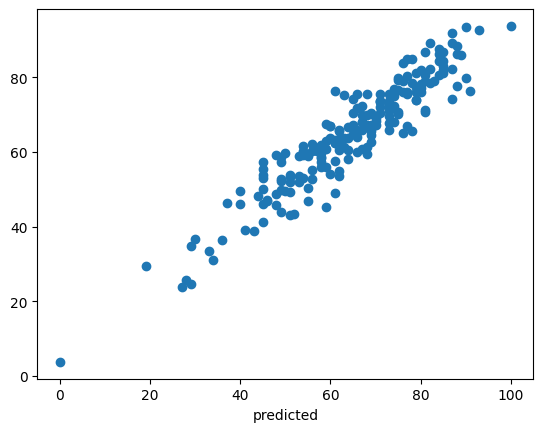

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.xlabel('predicted')